# 0.0. IMPORTS

In [57]:
import inflection
import math

import numpy             as np
import matplotlib.pyplot as plt
import pandas            as pd
import seaborn           as sns

from IPython.core.display import HTML
from IPython.display import Image


## 0.1. Helper Functions

In [40]:
def load_csv(path):
    df = pd.read_csv(path, low_memory=False)
    return df

def rename_columns(df, old_columns):
    snakecase = lambda x: inflection.underscore(x)

    cols_new = list(map(snakecase, old_columns))

    print(f"Old columns: {df.columns.to_list()}")
    
    # Rename
    df.columns = cols_new
    
    print(f"\nNew columns: {df.columns.to_list()}")

    print('\n', df.columns)
    return df

def show_dimensions(df):
    print(f"Number of Rows:    {df1.shape[0]}")
    print(f"Number of Columns: {df1.shape[1]}")
    print(f"Shape:             {df1.shape}")
    
    return None

def show_data_types(df):
    print(df.dtypes)
    
    return None

def check_na(df):
    print(df.isna().sum())
    
    return None

def show_descriptive_statistical(df):
    # Central Tendency - mean, median
    ct1 = pd.DataFrame(df.apply(np.mean)).T
    ct2 = pd.DataFrame(df.apply(np.median)).T

    # Dispersion - std, min, max, range, skew, kurtosis
    d1 = pd.DataFrame(df.apply(np.std)).T
    d2 = pd.DataFrame(df.apply(min)).T
    d3 = pd.DataFrame(df.apply(max)).T
    d4 = pd.DataFrame(df.apply(lambda x: x.max() - x.min())).T
    d5 = pd.DataFrame(df.apply(lambda x: x.skew())).T
    d6 = pd.DataFrame(df.apply(lambda x: x.kurtosis())).T

    m = pd.concat([d2, d3, d4, ct1, ct2, d1, d5, d6]).T.reset_index()
    m.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']
    print(m)
    
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    
    plt.style.use( 'ggplot')
    plt.rcParams['figure.figsize'] = [24, 9]
    plt.rcParams['font.size'] = 24
    
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    
    sns.set()

In [41]:
jupyter_settings()

Populating the interactive namespace from numpy and matplotlib


## 0.2. Path Definition

In [3]:
# path
home_path = 'C:\\Users\\sindolfo\\rossmann-stores-sales\\'
raw_data_path = 'data\\raw\\'
interim_data_path = 'data\\interim\\'


## 0.3. Loading Data

In [4]:
## Historical data including Sales
df_sales_raw = load_csv(home_path+raw_data_path+'train.csv')

## Supplemental information about the stores
df_store_raw = load_csv(home_path+raw_data_path+'store.csv')

# Merge
df_raw = pd.merge(df_sales_raw, df_store_raw, how='left', on='Store')

# 1.0. DATA DESCRIPTION

In [5]:
df1 = df_raw.copy()
df1.to_csv(home_path+interim_data_path+'df1.csv')

### Data fields

Most of the fields are self-explanatory. The following are descriptions for those that aren't.

- **Id** - an Id that represents a (Store, Date) duple within the test set
- **Store** - a unique Id for each store
- **Sales** - the turnover for any given day (this is what you are predicting)
- **Customers** - the number of customers on a given day
- **Open** - an indicator for whether the store was open: 0 = closed, 1 = open
- **StateHoliday** - indicates a state holiday. Normally
all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public
holiday, b = Easter holiday, c = Christmas, 0 = None
- **SchoolHoliday** - indicates if the (Store, Date) was affected by the closure of public schools
- **StoreType** - differentiates between 4 different store models: a, b, c, d
- **Assortment** - describes an assortment level: a = basic, b = extra, c = extended
- **CompetitionDistance** - distance in meters to the nearest competitor store
- **CompetitionOpenSince[Month/Year]** - gives the approximate year and month of the time the nearest competitor was opened
- **Promo** - indicates whether a store is running a promo on that day
- **Promo2** - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
- **Promo2Since[Year/Week]** - describes the year and calendar week when the store started participating in Promo2
- **PromoInterval** - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew.
E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

## 1.1. Rename Columns

In [6]:
cols_old = [
    'Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
    'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
    'CompetitionDistance', 'CompetitionOpenSinceMonth',
    'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
    'Promo2SinceYear', 'PromoInterval'
]

df1 = rename_columns(df1, cols_old)

Old columns: ['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment', 'CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval']

New columns: ['store', 'day_of_week', 'date', 'sales', 'customers', 'open', 'promo', 'state_holiday', 'school_holiday', 'store_type', 'assortment', 'competition_distance', 'competition_open_since_month', 'competition_open_since_year', 'promo2', 'promo2_since_week', 'promo2_since_year', 'promo_interval']

 Index(['store', 'day_of_week', 'date', 'sales', 'customers', 'open', 'promo',
       'state_holiday', 'school_holiday', 'store_type', 'assortment',
       'competition_distance', 'competition_open_since_month',
       'competition_open_since_year', 'promo2', 'promo2_since_week',
       'promo2_since_year', 'promo_interval'],
      dtype='object')


## 1.2. Data Dimensions

In [7]:
show_dimensions(df1)

Number of Rows:    1017209
Number of Columns: 18
Shape:             (1017209, 18)


## 1.3. Data Types

In [8]:
show_data_types(df1)

## Date is a object type. This is wrong. In the section "Types Changes" others chages is made. 
df1['date'] = pd.to_datetime(df1['date'])

store                             int64
day_of_week                       int64
date                             object
sales                             int64
customers                         int64
open                              int64
promo                             int64
state_holiday                    object
school_holiday                    int64
store_type                       object
assortment                       object
competition_distance            float64
competition_open_since_month    float64
competition_open_since_year     float64
promo2                            int64
promo2_since_week               float64
promo2_since_year               float64
promo_interval                   object
dtype: object


## 1.4. Check NA

In [9]:
check_na(df1)

## Columns with NA vales
## competition_distance              2642
## competition_open_since_month    323348
## competition_open_since_year     323348
## promo2_since_week               508031
## promo2_since_year               508031
## promo_interval                  508031

store                                0
day_of_week                          0
date                                 0
sales                                0
customers                            0
open                                 0
promo                                0
state_holiday                        0
school_holiday                       0
store_type                           0
assortment                           0
competition_distance              2642
competition_open_since_month    323348
competition_open_since_year     323348
promo2                               0
promo2_since_week               508031
promo2_since_year               508031
promo_interval                  508031
dtype: int64


## 1.5. Fillout NA

In [10]:
# competition_distance: distance in meters to the nearest competitor store
# 
# Assumption: if there is a row that is NA in this column, 
# it is because there is no close competitor. 
# The way I used to represent this is to put 
# a number much larger than the maximum value 
# of the competition_distance variable.
# 
# The number is 250000.
df1['competition_distance'] = df1['competition_distance'].apply(lambda x : 250000 if math.isnan(x) else x)


# competition_open_since_month: 
# gives the approximate year and month of the 
# time the nearest competitor was opened
#
# Assumption: I'm going to keep this variable because 
# it's important to have something that expresses 
# the feeling of "since it happened" or "until when".
# 
# If it's NA I'll copy the month of sale of that line.
df1['competition_open_since_month'] = df1.apply(lambda x: x['date'].month if math.isnan(x['competition_open_since_month']) else x['competition_open_since_month'], axis=1)

#competition_open_since_year 
# The same assumption from competition_open_since_month
df1['competition_open_since_year'] = df1.apply(lambda x: x['date'].year if math.isnan(x['competition_open_since_year']) else x['competition_open_since_year'], axis=1)


# promo2_since_week: 
# describes the year and calendar week when the store started participating in Promo2
# 
# The same assumption from competition_open_since_month
df1['promo2_since_week'] = df1.apply(lambda x: x['date'].week if math.isnan(x['promo2_since_week']) else x['promo2_since_week'], axis=1)

              
# promo2_since_year:
# describes the year and calendar week when the store started participating in Promo2
df1['promo2_since_year'] = df1.apply(lambda x: x['date'].week if math.isnan(x['promo2_since_year']) else x['promo2_since_year'], axis=1)


# promo_interval
month_map = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug',9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}

df1['promo_interval'].fillna(0, inplace=True)

df1['month_map'] = df1['date'].dt.month.map(month_map)

df1['is_promo'] = df1[['promo_interval', 'month_map']].apply(lambda x: 0 if x['promo_interval'] == 0 else 1 if x['month_map'] in x['promo_interval'].split(',') else 0, axis=1)

## 1.6. Type Changes

In [20]:
df1['competition_open_since_month'] = df1['competition_open_since_month'].astype('int64')
df1['competition_open_since_year'] = df1['competition_open_since_year'].astype('int64')
df1['promo2_since_week'] = df1['promo2_since_week'].astype('int64')
df1['promo2_since_year'] = df1['promo2_since_year'].astype('int64')

## 1.7. Descriptive Statistical

In [22]:
num_attributes = df1.select_dtypes(include=['int64', 'float64'])
cat_attributes = df1.select_dtypes(exclude=['int64', 'float64', 'datetime64[ns]'])

### 1.7.1 Numerical Attributes

In [31]:
show_descriptive_statistical(num_attributes)

                      attributes     min       max     range         mean  \
0                          store     1.0    1115.0    1114.0   558.429727   
1                    day_of_week     1.0       7.0       6.0     3.998341   
2                          sales     0.0   41551.0   41551.0  5773.818972   
3                      customers     0.0    7388.0    7388.0   633.145946   
4                           open     0.0       1.0       1.0     0.830107   
5                          promo     0.0       1.0       1.0     0.381515   
6                 school_holiday     0.0       1.0       1.0     0.178647   
7           competition_distance    20.0  250000.0  249980.0  6065.307828   
8   competition_open_since_month     1.0      12.0      11.0     6.786849   
9    competition_open_since_year  1900.0    2015.0     115.0  2010.324840   
10                        promo2     0.0       1.0       1.0     0.500564   
11             promo2_since_week     1.0      52.0      51.0    23.619033   

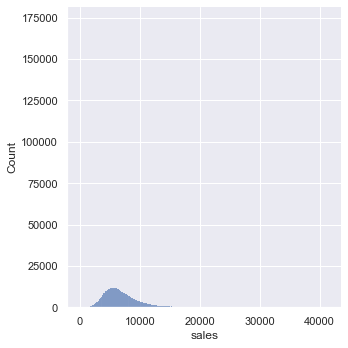

In [58]:
sns.displot(df1['sales'])

### 1.7.2 Categorical Attributes

In [49]:
cat_attributes.apply(lambda x: x.unique().shape[0])

state_holiday      4
store_type         4
assortment         3
promo_interval     4
month_map         12
dtype: int64

<AxesSubplot:xlabel='assortment', ylabel='sales'>

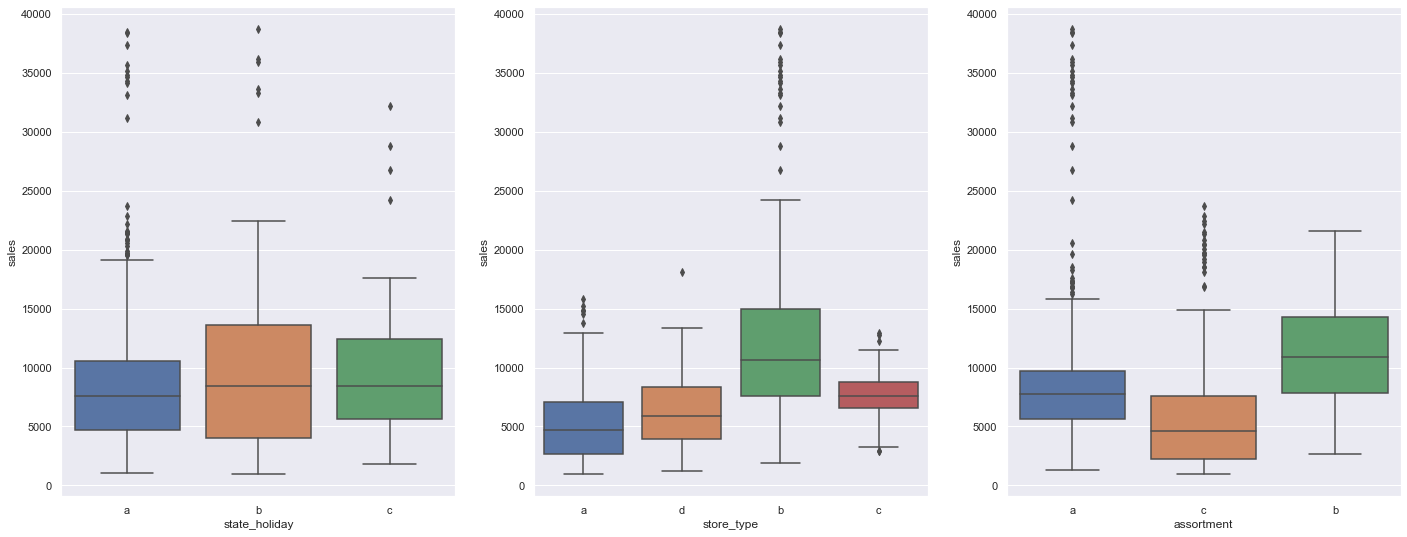

In [55]:
aux1 = df1[(df1['state_holiday'] != '0') & (df1['sales'] > 0)]

plt.subplot(1, 3, 1)
sns.boxplot(x='state_holiday', y='sales', data=aux1)

plt.subplot(1, 3, 2)
sns.boxplot(x='store_type', y='sales', data=aux1)

plt.subplot(1, 3, 3)
sns.boxplot(x='assortment', y='sales', data=aux1)